In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv("cleaned census_20.csv")

###  INSIGHTS

## Age distribution 

<AxesSubplot:title={'center':'Age Distribution'}, ylabel='Frequency'>

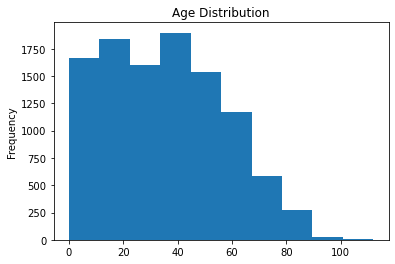

In [3]:
df.Age.plot(kind='hist', title='Age Distribution')

In [4]:
df.Religion.unique()

array(['Catholic', 'Christian', 'None', 'Methodist', 'Sikh', 'Muslim',
       'Undecided', 'Jewish', 'Bahai', 'Pagan', 'Private', 'Buddist',
       'Sith', 'Quaker', 'Agnostic'], dtype=object)

In [5]:
religion_grp = df.groupby("Religion")["Gender"].count()

In [6]:
religion_grp

Religion
Agnostic        2
Bahai           3
Buddist         6
Catholic     1488
Christian    2820
Jewish         40
Methodist     979
Muslim        160
None         5002
Pagan           4
Private         6
Quaker          3
Sikh           92
Sith            4
Undecided       1
Name: Gender, dtype: int64

In [7]:
percentage_of_Catholic = (1488*100)/10610
print (percentage_of_Catholic)

14.024505183788879


In [8]:
percentage_of_Christian = (2820*100)/10610
print (percentage_of_Christian)

26.578699340245052


In [9]:
percentage_of_Muslim = (160*100)/10610
print (percentage_of_Muslim)

1.5080113100848256


In [10]:
percentage_of_None = (5002*100)/10610
print (percentage_of_None)

47.14420358152686


In [11]:
# create new table

rel_freq = pd.DataFrame(religion_grp)

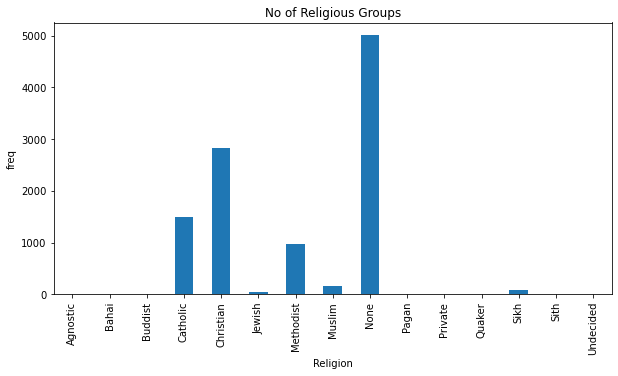

In [12]:
rel_freq.plot(kind="bar", figsize=(10,5), legend=False)
plt.title("No of Religious Groups")
plt.ylabel("freq")
plt.show()

In [13]:
# save current state of the dataset
df2 = df.copy()

## using pd.cut with the custom bins

In [14]:
# creating bins for the Ages 
ageClass = [ '0-9','10-19','20-29', '30-39','40-49','50-59','60-69', '70-79','80-89','90-99','100+'] 

bins = [0,10,20,30,40,50,60,70,80,90,100,110]

In [15]:
pd.cut(df2.Age, bins)

0        (40, 50]
1        (20, 30]
2        (80, 90]
3        (50, 60]
4        (10, 20]
           ...   
10605    (40, 50]
10606     (0, 10]
10607     (0, 10]
10608    (30, 40]
10609    (20, 30]
Name: Age, Length: 10610, dtype: category
Categories (11, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (70, 80] < (80, 90] < (90, 100] < (100, 110]]

In [16]:
# Each Age in the dataset falls into the bin described above
# we then create a new column in the dataset with labels for the age bins
df2["age_category"] = pd.cut(df2.Age, bins=bins, labels=ageClass)

In [17]:
df2.head()

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Marital Staus,age_category
0,0,1,Smith Radial,Grace,Patel,46,Head,Widowed,Female,Petroleum engineer,None,Catholic,NaN,40-49
1,1,1,Smith Radial,Ian,Nixon,24,Lodger,Single,Male,Publishing rights manager,None,Christian,NaN,20-29
2,2,2,Smith Radial,Frederick,Read,87,Head,Divorced,Male,Retired TEFL teacher,None,Catholic,NaN,80-89
3,3,3,Smith Radial,Daniel,Adams,58,Head,Divorced,Male,"Therapist, music",None,Catholic,NaN,50-59
4,4,3,Smith Radial,Matthew,Hall,13,Grandson,Divorced,Male,Student,None,Catholic,NaN,10-19


## Gender


In [18]:
# gender

df2.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [19]:
gender_grp = df.groupby("Gender")["Gender"].count()

In [20]:
gender_grp

Gender
Female    5509
Male      5101
Name: Gender, dtype: int64

In [21]:
gender_freq = pd.DataFrame(gender_grp)

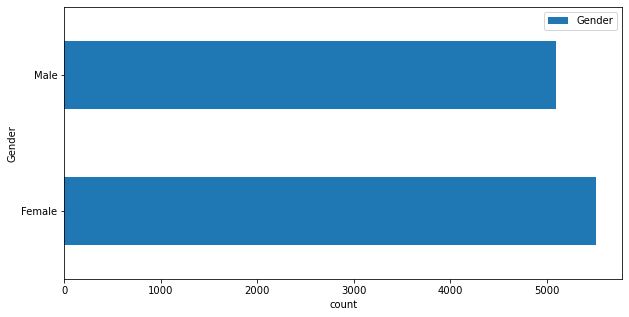

In [22]:
gender_freq.plot(kind="barh", figsize=(10,5))
plt.xlabel("count")
plt.show()

In [23]:
age_cat_grp = df2.groupby("age_category")["Gender"].count()

### Marital Status

In [24]:
marital_status_cat_grp = df2.groupby("Marital Status")["Age"].count()

<AxesSubplot:xlabel='Marital Status'>

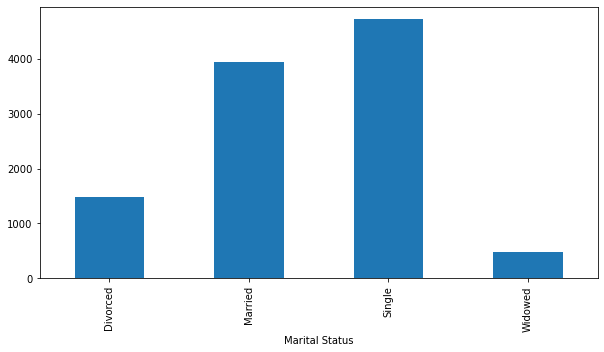

In [25]:
marital_status_cat_grp.plot(kind="bar", figsize=(10,5), legend=False)

In [26]:
marital_status_cat_grp.describe

<bound method NDFrame.describe of Marital Status
Divorced    1486
Married     3934
Single      4717
Widowed      473
Name: Age, dtype: int64>

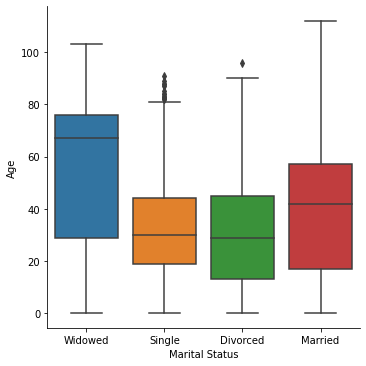

In [27]:
sns.catplot(x=df["Marital Status"], y=df["Age"], data=df, kind='box')

In [28]:
df['Marital Status'].describe()

count      10610
unique         4
top       Single
freq        4717
Name: Marital Status, dtype: object

### Age

In [29]:
age_cat_freq = pd.DataFrame(age_cat_grp)

<AxesSubplot:xlabel='age_category'>

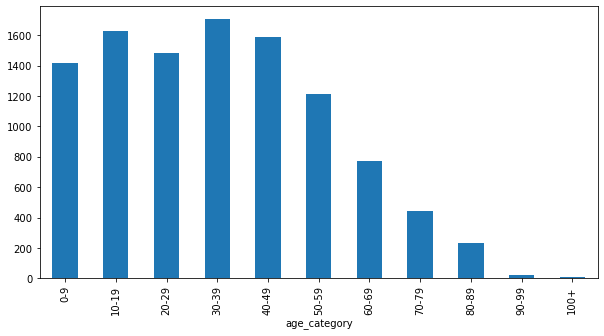

In [30]:
age_cat_freq.plot(kind="bar", figsize=(10,5), legend=False)

In [31]:
age_cat_freq.count

<bound method DataFrame.count of               Gender
age_category        
0-9             1418
10-19           1629
20-29           1485
30-39           1704
40-49           1589
50-59           1213
60-69            772
70-79            446
80-89            230
90-99             22
100+               6>

### Occupation

In [32]:
df2.Occupation.sort_values()

2156                         
6092       Academic librarian
3343       Academic librarian
6046       Academic librarian
9160    Accommodation manager
                ...          
803              Youth worker
771              Youth worker
2009             Youth worker
95               Youth worker
8992             Youth worker
Name: Occupation, Length: 10610, dtype: object

In [33]:
df2.groupby("Occupation")["age_category"].count()

Occupation
                                    1
Academic librarian                  3
Accommodation manager              10
Accountant, chartered              17
Accountant, chartered certified    12
                                   ..
Water quality scientist             9
Web designer                       13
Wellsite geologist                  8
Writer                             11
Youth worker                        6
Name: age_category, Length: 1113, dtype: int64

In [34]:
for x in df["Occupation"]:
    print (x)


Petroleum engineer
Publishing rights manager
Retired TEFL teacher
Therapist, music
Student
Student
Physiotherapist
Student
Retired Estate manager/land agent
Retired Merchandiser, retail
Press sub
Research scientist (medical)
Student
IT sales professional
Student
Student
Student
Child
Retired Audiological scientist
Retired Building surveyor
Nurse, learning disability
Cabin crew
Student
Student
Retired Development worker, community
IT technical support officer
Forest/woodland manager
Retired Geophysical data processor
Retired Bonds trader
Retired Podiatrist
Retired Quantity surveyor
Mining engineer
Student
Child
Wellsite geologist
University Student
Nurse, children's
Therapist, art
Museum/gallery exhibitions officer
Pharmacist, community
Child
Child
Engineer, biomedical
Retired Music therapist
Retired Scientist, product/process development
Designer, exhibition/display
Child
Geologist, engineering
Prison officer
Student
Student
Child
Therapist, drama
Hotel manager
Student
Art therapist
St

Hydrologist
Student
Restaurant manager, fast food
Engineer, control and instrumentation
Student
Child
Child
Scientist, research (physical sciences)
Designer, jewellery
Student
Engineer, structural
University Student
Museum/gallery conservator
Rural practice surveyor
Tax adviser
Ecologist
Accountant, chartered management
Scientist, research (physical sciences)
Student
Cytogeneticist
Community development worker
Child
Contractor
Designer, blown glass/stained glass
Armed forces technical officer
Civil engineer, consulting
Child
Conservation officer, nature
Chiropodist
Unemployed
Student
Unemployed
Student
Student
Retired Development worker, community
University Student
University Student
Chief Financial Officer
Child
Child
Psychotherapist, child
Unemployed
Psychotherapist, dance movement
Warehouse manager
Engineer, production
Systems analyst
Child
Minerals surveyor
Purchasing manager
Engineer, civil (consulting)
Armed forces logistics/support/administrative officer
Student
Personnel offic

Engineer, maintenance
Student
Database administrator
Student
Student
Unemployed
Programmer, systems
Child psychotherapist
Museum/gallery conservator
Interpreter
Clinical scientist, histocompatibility and immunogenetics
Press sub
Sales promotion account executive
Passenger transport manager
Mechanical engineer
Unemployed
Child
Child
Bookseller
Sales executive
University Student
Student
Retired Health and safety inspector
Retired Ambulance person
Magazine journalist
Child
Retired Astronomer
Retired Horticulturist, commercial
Unemployed
Field seismologist
Market researcher
Ceramics designer
Higher education careers adviser
Scientist, forensic
Unemployed
Student
Unemployed
Student
Surveyor, hydrographic
Unemployed
Scientist, research (physical sciences)
Unemployed
Interior and spatial designer
Student
Applications developer
Media planner
University Student
Student
Student
Student
Call centre manager
Student
Commissioning editor
Lecturer, higher education
Student
Student
Sound technician, b

Geologist, wellsite
University Student
Student
Retired Psychotherapist, dance movement
Unemployed
University Student
University Student
University Student
Clinical molecular geneticist
University Student
Senior tax professional/tax inspector
Retired Pharmacologist
Retired Brewing technologist
Unemployed
Child
Mining engineer
Advertising copywriter
Horticultural therapist
Secondary school teacher
Student
Student
Corporate treasurer
Solicitor, Scotland
Student
Student
Dispensing optician
Retired Media planner
Retired Brewing technologist
Stage manager
Physicist, medical
Prison officer
Optician, dispensing
Curator
University Student
Student
Retired Market researcher
Retired Publishing rights manager
Merchant navy officer
Event organiser
Geophysical data processor
University Student
Pension scheme manager
Trade mark attorney
Student
Unemployed
Student
Student
Psychotherapist, dance movement
Art therapist
Dispensing optician
Medical physicist
Designer, industrial/product
Student
Retired Hyd

Statistician
Accountant, chartered public finance
Student
Astronomer
Retired Interpreter
Industrial/product designer
University Student
Student
Child
Government social research officer
Diagnostic radiographer
Student
Student
Student
Secondary school teacher
Television camera operator
Student
Student
Podiatrist
Retired Broadcast engineer
Fashion designer
Pensions consultant
Marketing executive
Student
Multimedia programmer
Retired Barrister
Retired Health and safety adviser
Retired Visual merchandiser
Scientist, forensic
Horticultural consultant
Pharmacologist
Arboriculturist
Media planner
Student
Advice worker
Biochemist, clinical
Student
Therapeutic radiographer
Banker
Surveyor, quantity
Aeronautical engineer
Student
Student
Student
Retired Geneticist, molecular
Retired Equities trader
Graphic designer
Unemployed
Management consultant
Pharmacist, hospital
Child
Materials engineer
Cartographer
Student
Child
Government social research officer
Scientific laboratory technician
Retired Spo

Student
Soil scientist
Mechanical engineer
University Student
University Student
Student
Student
Child
Electronics engineer
Unemployed
Student
Student
Student
Site engineer
Sales professional, IT
Therapist, nutritional
Fashion designer
Television floor manager
Retail buyer
Insurance broker
Management consultant
Student
Student
Teacher, special educational needs
Secretary/administrator
Scientist, research (maths)
University Student
Student
Unemployed
Child
Energy manager
Therapist, nutritional
Pharmacist, community
University Student
Rural practice surveyor
Conference centre manager
Brewing technologist
Television production assistant
Retired Tax adviser
Fashion designer
Child
Estate agent
Neurosurgeon
Dance movement psychotherapist
Retired Museum/gallery exhibitions officer
University Student
Student
Student
Student
Patent examiner
Student
Student
Student
Child
Child
Hospital pharmacist
Commercial/residential surveyor
International aid/development worker
Advice worker
University Studen

Unemployed
Administrator, local government
Research scientist (maths)
Newspaper journalist
Public affairs consultant
Video editor
Student
Student
Broadcast engineer
Chartered public finance accountant
Insurance underwriter
Market researcher
Higher education careers adviser
Unemployed
Student
Child
Engineer, communications
Technical brewer
University Student
Unemployed
Lexicographer
Student
Surveyor, commercial/residential
Programmer, systems
University Student
Student
Retired Animal technologist
Research scientist (medical)
Sales promotion account executive
Retired Electrical engineer
Health service manager
Retired Community arts worker
University Student
Armed forces logistics/support/administrative officer
Radiographer, therapeutic
Retired Industrial/product designer
Solicitor
Administrator, sports
Film/video editor
Retired Engineer, water
Retired Commercial horticulturist
Ambulance person
Youth worker
Unemployed
Student
Physiological scientist
Retired Higher education careers advise

Child
Dancer
Advice worker
Child
University Student
Civil Service administrator
Retired Journalist, broadcasting
Catering manager
Administrator
Child
Management consultant
Naval architect
Student
Child
Financial adviser
Student
Student
Pathologist
Unemployed
Student
Unemployed
Ship broker
Legal executive
Contracting civil engineer
General practice doctor
Student
University Student
University Student
University Student
Retired Museum/gallery exhibitions officer
Museum/gallery exhibitions officer
Estate manager/land agent
University Student
Administrator, arts
Fish farm manager
Child
Administrator, education
Accounting technician
Geophysical data processor
Student
Theatre manager
Geneticist, molecular
Volunteer coordinator
University Student
Student
Nurse, mental health
Medical physicist
Student
Office manager
Therapist, occupational
Scientist, marine
Engineer, automotive
Firefighter
Risk analyst
Cabin crew
Retired Environmental consultant
Retired Cabin crew
University Student
University

In [35]:
occ1 = df["Occupation"].value_counts()
occ_freq = (df["Occupation"].value_counts()/df.shape[0])*100
 
occ_table = pd.DataFrame(occ1).join(pd.DataFrame(occ_freq), how="left", lsuffix=" (count)", rsuffix=" (freq %)")

In [36]:
occ1.head()


Student                       2125
University Student             685
Unemployed                     662
Child                          619
Surveyor, building control      20
Name: Occupation, dtype: int64

In [37]:
occ1.head(55)

Student                                      2125
University Student                            685
Unemployed                                    662
Child                                         619
Surveyor, building control                     20
PhD Student                                    19
Designer, textile                              18
Engineer, chemical                             17
Pensions consultant                            17
Media planner                                  17
Accountant, chartered                          17
Therapist, drama                               17
Photographer                                   16
Insurance underwriter                          16
Therapist, music                               16
Company secretary                              16
Newspaper journalist                           16
Musician                                       16
Personal assistant                             16
Research scientist (life sciences)             15


In [38]:
percentage_of_unemployed = (662*100)/10610
print (percentage_of_unemployed)

6.239396795475966


In [39]:
percentage_of_uni_students = (682*100)/10610
print (percentage_of_uni_students)

6.427898209236569


In [40]:
percentage_of_students = (2125*100)/10610
print (percentage_of_students)

20.02827521206409


In [41]:
percentage_of_kids = (662*100)/10610
print (percentage_of_kids)

6.239396795475966


In [42]:
grp1 = df2.groupby(["Occupation", "age_category"])["age_category"].count()

### Infirmity

In [43]:
df2["Infirmity"].unique()

array(['None', 'Deaf', 'Mental Disability', 'Unknown Infection',
       'Disabled', 'Physical Disability', 'Blind'], dtype=object)

In [44]:
infirmity_grp = df.groupby("Infirmity")["Infirmity"].count()

In [45]:
infirmity_grp.count

<bound method Series.count of Infirmity
Blind                      4
Deaf                      13
Disabled                   8
Mental Disability         15
None                   10538
Physical Disability       20
Unknown Infection         12
Name: Infirmity, dtype: int64>

In [46]:
percentage_of_healthy_citizens = (10538*100)/10610
print (percentage_of_healthy_citizens)

99.32139491046183


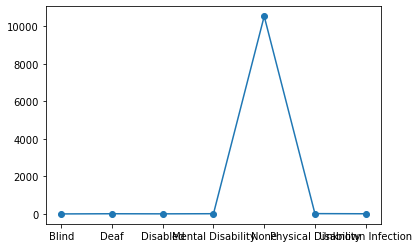

In [47]:
plt.plot(infirmity_grp, marker = 'o')
plt.show()

### Building Age Pyramid

In [48]:
# Age column creating age pyramid
# create bins so as to have age categories 
bins = list(range(0,110, 5))
df["age_cat"] = pd.cut(df.Age, bins=bins, 
                      labels=["0-5","5-10","10-15","15-20","20-25","25-30","30-35",
                              "35-40","40-45","45-50","50-55","55-60","60-65","65-70","70-75",
                             "75-80","80-85","85-90","90-95","95-100","100-105"])

In [49]:
df.head(3)

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Marital Staus,age_cat
0,0,1,Smith Radial,Grace,Patel,46,Head,Widowed,Female,Petroleum engineer,None,Catholic,NaN,45-50
1,1,1,Smith Radial,Ian,Nixon,24,Lodger,Single,Male,Publishing rights manager,None,Christian,NaN,20-25
2,2,2,Smith Radial,Frederick,Read,87,Head,Divorced,Male,Retired TEFL teacher,None,Catholic,NaN,85-90


In [50]:
grp_males = df[df["Gender"] == "Male"]
grp_females = df[df["Gender"] == "Female"]

In [51]:
# Get the number of People in each Age category 

In [52]:
no_males_age = grp_males.groupby("age_cat")["Age"].count()
no_females_age = grp_females.groupby("age_cat")["Age"].count()

In [53]:
no_females_age

age_cat
0-5        342
5-10       379
10-15      358
15-20      408
20-25      398
25-30      385
30-35      458
35-40      475
40-45      475
45-50      403
50-55      319
55-60      288
60-65      210
65-70      184
70-75      156
75-80       93
80-85       88
85-90       26
90-95        5
95-100       8
100-105      3
Name: Age, dtype: int64

In [54]:
no_females_age.mode()

0    475
dtype: int64

In [55]:
no_females_age.describe()

count     21.000000
mean     260.047619
std      168.720027
min        3.000000
25%       93.000000
50%      319.000000
75%      398.000000
max      475.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='age_cat'>

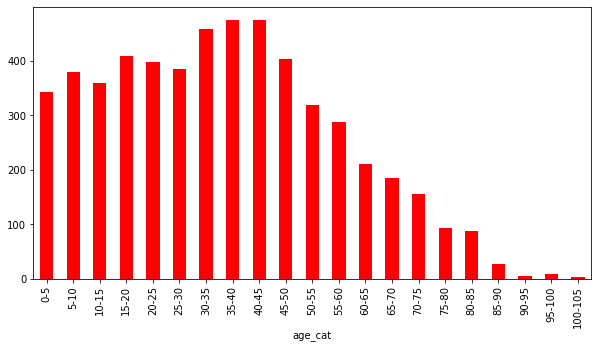

In [56]:
no_females_age.plot(kind="bar", figsize=(10,5), color=('red'), legend=False)

In [57]:
no_males_age

age_cat
0-5        326
5-10       371
10-15      420
15-20      443
20-25      351
25-30      351
30-35      375
35-40      396
40-45      361
45-50      350
50-55      301
55-60      305
60-65      235
65-70      143
70-75      124
75-80       73
80-85       58
85-90       58
90-95        5
95-100       4
100-105      3
Name: Age, dtype: int64

In [58]:
no_males_age.describe()

count     21.000000
mean     240.619048
std      155.589998
min        3.000000
25%       73.000000
50%      305.000000
75%      361.000000
max      443.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='age_cat'>

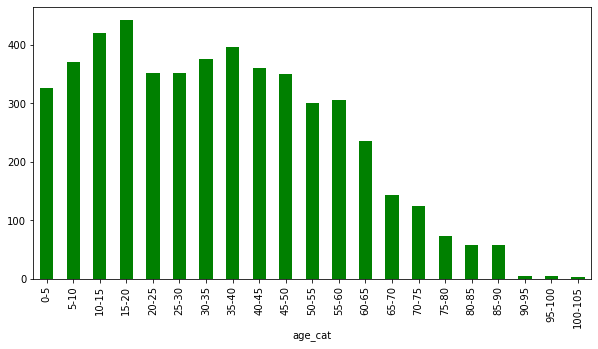

In [59]:
no_males_age.plot(kind="bar", figsize=(10,5), color=('green'), legend=False)

In [60]:
(pd.Series(no_females_age, index=None))

age_cat
0-5        342
5-10       379
10-15      358
15-20      408
20-25      398
25-30      385
30-35      458
35-40      475
40-45      475
45-50      403
50-55      319
55-60      288
60-65      210
65-70      184
70-75      156
75-80       93
80-85       88
85-90       26
90-95        5
95-100       8
100-105      3
Name: Age, dtype: int64

In [61]:
(pd.Series(no_males_age, index=None))

age_cat
0-5        326
5-10       371
10-15      420
15-20      443
20-25      351
25-30      351
30-35      375
35-40      396
40-45      361
45-50      350
50-55      301
55-60      305
60-65      235
65-70      143
70-75      124
75-80       73
80-85       58
85-90       58
90-95        5
95-100       4
100-105      3
Name: Age, dtype: int64

In [62]:
#Age pyramid

[]

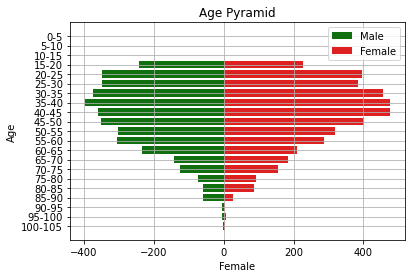

In [63]:
age_p = pd.DataFrame({'Age': ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45',
                              '45-50','50-55','55-60','60-65','65-70','70-75','75-80','80-85',
                              '85-90','90-95','95-100','100-105'],  
'Male': [0,0,0,-241,-348,-349,-375,-396,-361,-350,-301,-305,-235,-143,-124,-73,-58,-58,-5,-4,-3],  
'Female': [0,0,0,226,395,384,457,475,475,403,318,287,210,184,156,93,88,26,5,8,3]}) 

AgeClass = ["0-5","5-10","10-15","15-20","20-25","25-30","30-35",
                              "35-40","40-45","45-50","50-55","55-60","60-65","65-70","70-75",
                             "75-80","80-85","85-90","90-95","95-100","100-105"]

age_pyramid = sns.barplot(x='Male', y='Age', data=age_p, order=AgeClass, 
                            color=('green'), label='Male') 
age_pyramid = sns.barplot(x='Female', y='Age', data=age_p, order=AgeClass, 
                            color=('red'), label='Female') 
age_pyramid.legend() 
plt.title('Age Pyramid')
plt.grid()
plt.plot()